<!--

Suppose we have a Hamiltonian $\hat{H}$ with eigenvectors $|\psi_\lambda\rangle$ and associated eigenvalue $\lambda$. Then the following relation holds:
$$\hat{H}|\psi_\lambda\rangle=\lambda|\psi_\lambda\rangle$$

Unfortunately, we do not yet know the eigenvectors of our Hamiltonian. We also do not know the eigenvalues. So how can we calculate them?

Even though the normalization of the qubit state vector allows us to exclude eigenvectors and associated eigenvalues that are multiples of another eigenvector, there can be more than one eigenvector and associated eigenvalue for a matrix. 

The simple answer is: Just look at the quantum system. Look at the qubit!

IMG You can't just look at a qubit


Even though this succint answer is not entirely wrong, it misses the important point. To understand what that is, we need to become clear of the true meaning of looking at the quantum system.


- measuring a quantum system means destroying its superposition in a meaningful way
- math: inner product denotes the probability of measuring a state (vector) alongside a dimension (vector)
- it is a projection of the quantum state onto a scalar
- stern gerlach experiment: different angles, spin direction
- the angle is described by a Hermitian operator because it fits the properties of a physical observation
- what if we projected the qubit vector on the Hamiltonian of the vector? A projection of the vector onto the Hamiltonian, is the sum of the eigenvalues (the energy) of the system. This is the expectation value of the matrix. results in the variational principle
- the total Energy of the system is lower or equal to the expectation value of the Hamiltonian

-->

# Looking At Qubits


## Observable



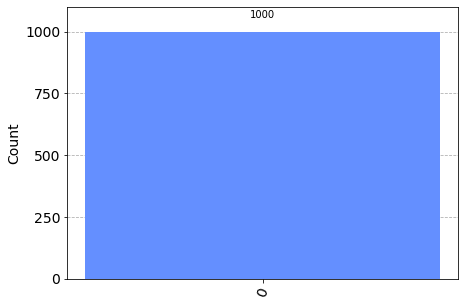

In [2]:
from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram

# Create a quantum circuit with one qubit
qc = QuantumCircuit(1)

# measure the qubit
qc.measure_all()

# Tell Qiskit how to simulate our circuit
backend = Aer.get_backend('qasm_simulator') 

# Do the simulation, returning the result
result = execute(qc,backend, shots=1000).result()

# Get the data and display histogram
counts = result.get_counts()
plot_histogram(counts)
#CAPTION Look at a qubit in state |0>

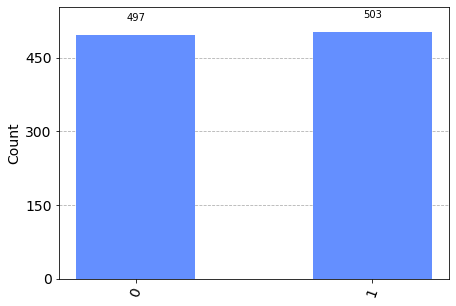

In [3]:
# Create a quantum circuit with one qubit
qc = QuantumCircuit(1)

# rotate the qubit to match our new computational basis
qc.h(0)

# measure the qubit
qc.measure_all()

# Tell Qiskit how to simulate our circuit
backend = Aer.get_backend('qasm_simulator') 

# Do the simulation, returning the result
result = execute(qc,backend, shots=1000).result()

# Get the data and display histogram
counts = result.get_counts()
plot_histogram(counts)
#CAPTION The horizontal basis


## Why are all atoms aligned vertically


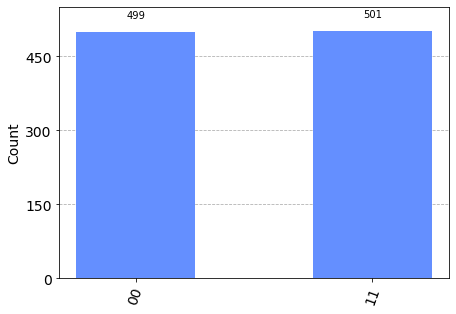

In [4]:
from qiskit import QuantumRegister, ClassicalRegister

# create a QuantumRegister to hold the qubit
qr = QuantumRegister(1)

# create the ClassicalRegister to receive the measurements
cr = ClassicalRegister(2)

# Create a quantum circuit with one qubit
qc = QuantumCircuit(qr, cr)

# chose the observable
qc.h(0)

# measure the qubit twice
qc.measure(qr[0], cr[0])
qc.measure(qr[0], cr[1])

# Tell Qiskit how to simulate our circuit
backend = Aer.get_backend('qasm_simulator') 

# Do the simulation, returning the result
result = execute(qc,backend, shots=1000).result()

# Get the data and display histogram
counts = result.get_counts()
plot_histogram(counts)
#CAPTION Measure a qubit twice

The results show that the measured values are the same in all cases. Accordingly, we measure the qubit twice as zero or twice as one. Now we want to measure the qubit twice from different angles. First, we measure the spin in the vertical and then in the horizontal direction.

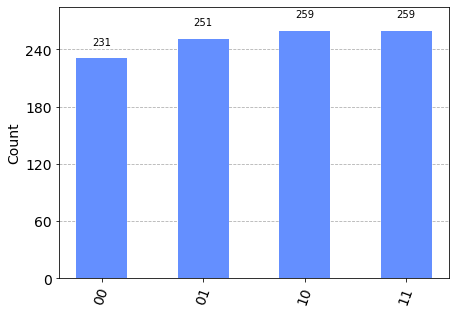

In [5]:
# create the circuit
qr = QuantumRegister(1)
cr = ClassicalRegister(2)
qc = QuantumCircuit(qr, cr)

# chose the observable
qc.h(0)

# measure the qubit once
qc.measure(qr[0], cr[0])

# rotate the apparatus
qc.h(0)

# measure the qubit again
qc.measure(qr[0], cr[1])

# Simulate the circuit
backend = Aer.get_backend('qasm_simulator') 
counts = execute(qc,backend, shots=1000).result().get_counts()
plot_histogram(counts)
#CAPTION Measure a qubit from different perspectives

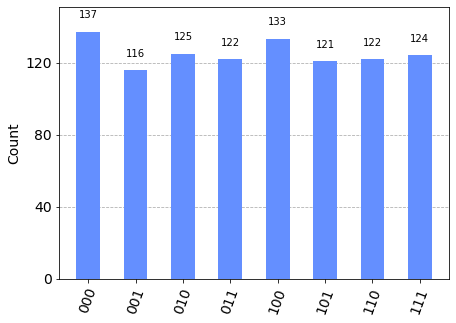

In [6]:
# create the circuit
qr = QuantumRegister(1)
cr = ClassicalRegister(3)
qc = QuantumCircuit(qr, cr)

qc.h(0) # chose the observable
qc.measure(qr[0], cr[0]) # measure the qubit once
qc.h(0) # rotate the apparaturs
qc.measure(qr[0], cr[1]) # measure the qubit again
qc.h(0) # rotate back the apparatus
qc.measure(qr[0], cr[2]) # measure the qubit again

# Simulate the circuit
backend = Aer.get_backend('qasm_simulator') 
counts = execute(qc,backend, shots=1000).result().get_counts()
plot_histogram(counts)
#CAPTION Measure a qubit three times